# K-Nearest-Neighbors

👇 `data` klasöründe bulunan `houses_clean.csv` dataset'ini yükleyin  
Veya doğrudan bu URL'den yükleyebilirsiniz: [https://d32aokrjazspmn.cloudfront.net/materials/ML_Houses_clean.csv](https://d32aokrjazspmn.cloudfront.net/materials/ML_Houses_clean.csv).  

Dataset açıklaması dataset-description.md dosyasında bulunabilir.

In [10]:
import pandas as pd
import numpy as np
url="https://d32aokrjazspmn.cloudfront.net/materials/ML_Houses_clean.csv"
df = pd.read_csv(url)
print(df.head())


   GrLivArea  BedroomAbvGr  KitchenAbvGr  OverallCond  CentralAir  SalePrice
0   0.380070         0.375      0.333333        0.500           1     208500
1  -0.312090         0.375      0.333333        0.875           1     181500
2   0.497489         0.375      0.333333        0.500           1     223500
3   0.390885         0.375      0.333333        0.500           1     140000
4   1.134029         0.500      0.333333        0.500           1     250000


💡 Çoğu özellik zaten önceden işlenmiştir (normalizasyonla ölçeklendirilmiştir), tıpkı Veri Hazırlama gününde yaptığınız gibi  

💡 Bir özellik olan `GrLiveArea` normalleştirilmemiştir. Daha sonra normalizasyonunun model performansımız üzerindeki etkisini görmek için bu şekilde tutuyoruz  

👇 Bunu tanımlayıcı istatistiklerle kolayca görebilirsiniz, min ve max değerlerine bakın

In [15]:
print("veriboyutu:",df.shape)
print("\nSütun isimleri:")
print(df.columns.tolist())
df.describe()

veriboyutu: (1460, 6)

Sütun isimleri:
['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallCond', 'CentralAir', 'SalePrice']


,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.078410,0.358305,0.348858,0.571918,0.934932,180921.195890
std,0.813952,0.101972,0.073446,0.139100,0.246731,79442.502883
min,-2.263422,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,-0.516802,0.250000,0.333333,0.500000,1.000000,129975.000000
50%,0.000000,0.375000,0.333333,0.500000,1.000000,163000.000000
75%,0.483198,0.375000,0.333333,0.625000,1.000000,214000.000000
max,6.455002,1.000000,1.000000,1.000000,1.000000,755000.000000


# Varsayılan KNN

🎯 Görev, tüm özelliklerle evlerin fiyatını (`SalePrice`) tahmin etmektir.

👇 Böyle bir görevde varsayılan [KNNRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)'ı değerlendirmek için çapraz doğrulama kullanın.  
❓ `SalePrice`'taki varyansın özellikler tarafından açıklanan oranı nedir?  
Cevabınızı `base_knn_score` adlı bir değişkende saklayın.

<details>
<summary> 💡 İpucu </summary>
    <br>
    ℹ️ Bağımlı değişkendeki varyansın bağımsız değişkenler tarafından açıklanan oranı R2 skoru'dur.
</details>

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, learning_curve


X=df.drop('SalePrice',axis=1)
y=df['SalePrice']
knn_base=KNeighborsRegressor()
base_knn_score=cross_val_score(knn_base,X,y, cv=5,scoring='r2').mean()
base_knn_score                  

0.608370347216843

### 🧪 Kodunuzu kontrol edin

In [26]:
from nbresult import ChallengeResult

result = ChallengeResult('default_score',
                         score = base_knn_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/funny/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/funny/S16D1-S-data-knn/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_default_score.py::TestDefault_score::test_score PASSED              [100%]

============================== 1 passed in 0.15s ===============================


💯 You can commit your code:

git add tests/default_score.pickle

git commit -m 'Completed default_score step'

git push origin master



# Ölçek duyarlılığı

KNN'ler ve mesafe tabanlı algoritmalar özelliklerin ölçeğine son derece duyarlı olabilir. 

👇 Özellik kümesini **tam ortak aralık** içinde yeniden ölçeklendirin ve `X_rescaled` adlı bir değişken altında kaydedin  
Ardından, yeniden ölçeklendirilmiş özellikler üzerinde bir modeli değerlendirin ve skorunu `rescaled_score` değişken adı altında kaydedin.

<details>
<summary> 💡 İpucu </summary>
    
`MinMaxScaler()`

Sadece `GrLiveArea`'nın normalleştirilmesi gerekmesine rağmen, tüm özelliklerinizde MinMaxScaler kullanmak sorun değil  
    
Gerçekten de, Min-Max Ölçeklendirme [idempotent](https://en.wikipedia.org/wiki/Idempotence) bir dönüşümdür: eğer $X_{max}=1$ ve $X_{min}=0$ ise, o zaman $X = \frac{X - X_{min}}{X_{max} - X_{min}}$
</details>

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_rescaled= pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns
)
print("önce")
print(f"  Min: {X['GrLivArea'].min():.2f}, Max: {X['GrLivArea'].max():.2f}")
print("sonra")
print(f"  Min: {X_rescaled['GrLivArea'].min():.2f}, Max: {X_rescaled['GrLivArea'].max():.2f}")



önce
  Min: -2.26, Max: 6.46
sonra
  Min: 0.00, Max: 1.00


In [36]:
rescaled_score= cross_val_score(knn_base,X_rescaled,y , cv=5,scoring='r2').mean()
print(f"Eski score:{base_knn_score:.4f}")
print(f"Yeni score:{rescaled_score:.4f}")

Eski score:0.6084
Yeni score:0.6499


👉 R2 skoru artmış olmalı!

💡 Mesafe tabanlı algoritmaları modellerken özelliklerin tam ortak aralıkta olması tercih edilir.  
Ancak, her zaman daha iyi bir skor garanti etmez.  
Bu bir deneme yanılma sürecidir.

### 🧪 Kodunuzu kontrol edin

In [37]:
from nbresult import ChallengeResult

result = ChallengeResult('scale_sensitivity',
                         base_score = base_knn_score,
                         rescaled_features = X_rescaled,
                         rescaled_score = rescaled_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/funny/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/funny/S16D1-S-data-knn/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 2 items

test_scale_sensitivity.py::TestScale_sensitivity::test_rescaled_features PASSED [ 50%]
test_scale_sensitivity.py::TestScale_sensitivity::test_score_inscrease PASSED [100%]

============================== 2 passed in 0.60s ===============================


💯 You can commit your code:

git add tests/scale_sensitivity.pickle

git commit -m 'Completed scale_sensitivity step'

git push origin master



# $k$ Optimizasyonu

👇 Yeniden ölçeklendirilmiş özellikler üzerinde bir KNNRegressor'ın K parametresini (`n_neighbors` parametresini kullanarak) ince ayarlayın. K 1'den 25'e kadar arttıkça skorun evrimini çizin.

In [47]:
from sklearn.neighbors import KNeighborsRegressor


k_values=range(1,26)
scores=[]

for k in k_values:
    knn=KNeighborsRegressor(n_neighbors=k)
    score=cross_val_score(knn,X_rescaled,y,cv=5,scoring='r2').mean()
    scores.append(score)
    print(f"K={k:2d}→ Skor: {score:.4f}")
          
best_k=k_values[np.argmax(scores)]
print(f"En iyi K değeri: {best_k}")
print(f"En iyi score: {max(scores):4f}")

K= 1→ Skor: 0.4872
K= 2→ Skor: 0.6271
K= 3→ Skor: 0.6347
K= 4→ Skor: 0.6426
K= 5→ Skor: 0.6499
K= 6→ Skor: 0.6524
K= 7→ Skor: 0.6537
K= 8→ Skor: 0.6525
K= 9→ Skor: 0.6553
K=10→ Skor: 0.6545
K=11→ Skor: 0.6572
K=12→ Skor: 0.6548
K=13→ Skor: 0.6558
K=14→ Skor: 0.6532
K=15→ Skor: 0.6506
K=16→ Skor: 0.6509
K=17→ Skor: 0.6488
K=18→ Skor: 0.6467
K=19→ Skor: 0.6437
K=20→ Skor: 0.6428
K=21→ Skor: 0.6414
K=22→ Skor: 0.6397
K=23→ Skor: 0.6381
K=24→ Skor: 0.6364
K=25→ Skor: 0.6352
En iyi K değeri: 11
En iyi score: 0.657170


❓ K'nın hangi değeri en iyi performansı üretir? Cevabınızı `best_k` değişken adı altında kaydedin.

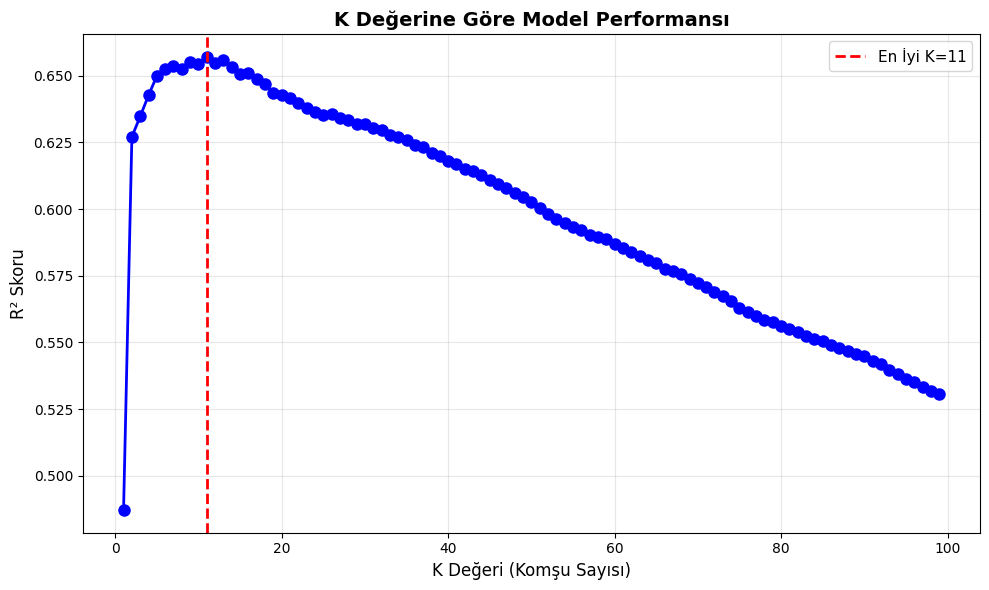

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(k_values, scores, marker='o', linewidth=2, markersize=8, color='blue')
plt.axvline(x=best_k, color='red', linestyle='--', linewidth=2, label=f'En İyi K={best_k}')
plt.xlabel('K Değeri (Komşu Sayısı)', fontsize=12)
plt.ylabel('R² Skoru', fontsize=12)
plt.title('K Değerine Göre Model Performansı', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

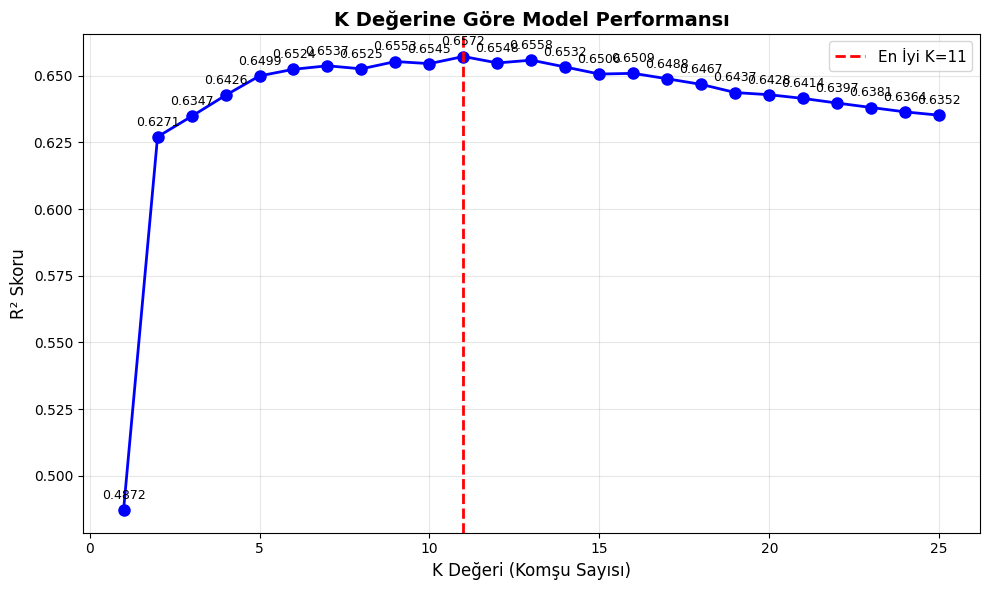

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o', linewidth=2, markersize=8, color='blue')

# Noktaların üstüne değer yazdırma
for k, score in zip(k_values, scores):
    plt.annotate(
        f"{score:.4f}",
        (k, score),
        textcoords="offset points",
        xytext=(0, 8),
        ha='center',
        fontsize=9
    )

plt.axvline(x=best_k, color='red', linestyle='--', linewidth=2,
            label=f'En İyi K={best_k}')

plt.xlabel('K Değeri (Komşu Sayısı)', fontsize=12)
plt.ylabel('R² Skoru', fontsize=12)
plt.title('K Değerine Göre Model Performansı', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()


<details>
<summary> 👉 Çözüm 👈</summary>
    
Grafiğinize bakarak, skorun k = 5 civarında artmayı durdurduğunu ve maksimum skorun k = 11 için ulaşıldığını görmelisiniz.

</details>

❓ $k$ < 5 değerleri için modelin kötü performansını nasıl yorumluyorsunuz?

<details>
<summary> 👉 Çözüm 👈</summary>
    
K çok küçük olduğunda, model eğitim kümesine aşırı uyum gösterme eğiliminde olacaktır. İyi genelleştirebilmek için çok az noktaya odaklanacaktır. K'yı artırmak modele tahminlerini dayandıracağı daha fazla örnek verecektir.

</details>

In [56]:
best_k=11


### 🧪 Kodunuzu kontrol edin

In [44]:
from nbresult import ChallengeResult

result = ChallengeResult('optimal_k',
                         optimal_k = best_k)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/funny/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/funny/S16D1-S-data-knn/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_optimal_k.py::TestOptimal_k::test_optimal_K_around_10 PASSED        [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/optimal_k.pickle

git commit -m 'Completed optimal_k step'

git push origin master



# KNN'de Aşırı Uyum

💡 KNN'lerin K parametresi çok küçük olduğunda, eğitim kümesine aşırı uyum gösterme ve iyi genelleştirememe riski vardır. 

👇 K=2 parametreli bir KNN'in öğrenme eğrilerini çizin.

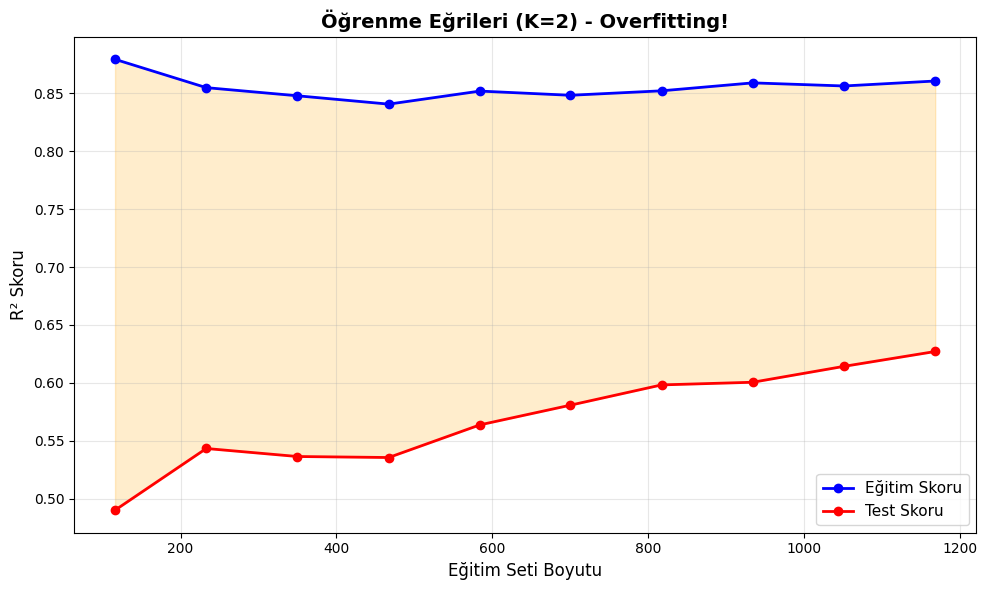

⚠️  K=2 ile:
   Eğitim skoru: 0.8606
   Test skoru:   0.6271
   Fark:         0.2336


In [53]:
from sklearn.model_selection import learning_curve

knn_overfit=KNeighborsRegressor(n_neighbors=2)

train_sizes,train_scores,test_score=learning_curve(
    knn_overfit,
    X_rescaled,
    y,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='r2'
)
train_mean=train_scores.mean(axis=1)

test_mean=test_score.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', linewidth=2, label='Eğitim Skoru')
plt.plot(train_sizes, test_mean, 'o-', color='red', linewidth=2, label='Test Skoru')
plt.fill_between(train_sizes, train_mean, test_mean, alpha=0.2, color='orange')
plt.xlabel('Eğitim Seti Boyutu', fontsize=12)
plt.ylabel('R² Skoru', fontsize=12)
plt.title('Öğrenme Eğrileri (K=2) - Overfitting!', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print(f"⚠️  K=2 ile:")
print(f"   Eğitim skoru: {train_mean[-1]:.4f}")
print(f"   Test skoru:   {test_mean[-1]:.4f}")
print(f"   Fark:         {train_mean[-1] - test_mean[-1]:.4f}")

👉 Yüksek eğitim skoru ama düşük test skoru gözlemlemelisiniz. ⚠️ Aşırı uyum uyarısı ⚠️ Bu çok düşük K parametresinden kaynaklanır.

In [58]:
print(f"best_k değeri: {best_k}")

best_k değeri: 11


# İdeal K

👇 Bu sefer, "$k$ Optimizasyonu" bölümünde bulduğunuz ideal K değeri için öğrenme eğrilerini çizin.

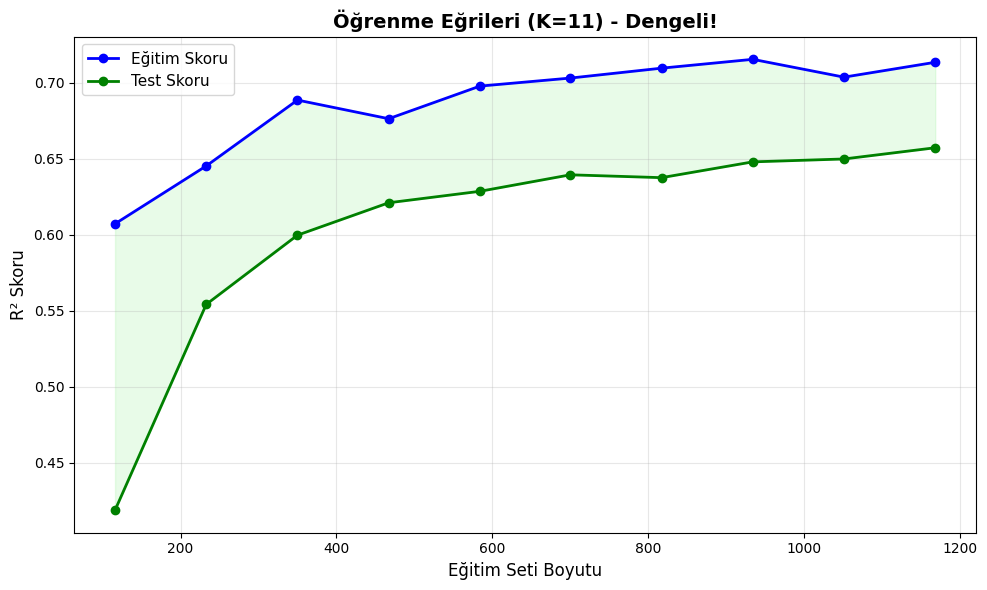

✅ K=11 ile:
   Eğitim skoru: 0.7134
   Test skoru:   0.6572
   Fark:         0.0562


In [61]:

knn_optimal=KNeighborsRegressor(n_neighbors=best_k)

train_sizes2,train_scores2,test_score2=learning_curve(
    knn_optimal,
    X_rescaled,
    y,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='r2'
)
train_mean2=train_scores2.mean(axis=1)

test_mean2=test_score2.mean(axis=1)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes2, train_mean2, 'o-', color='blue', linewidth=2, label='Eğitim Skoru')
plt.plot(train_sizes2, test_mean2, 'o-', color='green', linewidth=2, label='Test Skoru')
plt.fill_between(train_sizes2, train_mean2, test_mean2, alpha=0.2, color='lightgreen')
plt.xlabel('Eğitim Seti Boyutu', fontsize=12)
plt.ylabel('R² Skoru', fontsize=12)
plt.title(f'Öğrenme Eğrileri (K={best_k}) - Dengeli!', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"✅ K={best_k} ile:")
print(f"   Eğitim skoru: {train_mean2[-1]:.4f}")
print(f"   Test skoru:   {test_mean2[-1]:.4f}")
print(f"   Fark:         {train_mean2[-1] - test_mean2[-1]:.4f}")

👉 Eğriler yakınsamaya yakın olmalı, bu da modelin daha az aşırı uyum gösterdiğini ve daha iyi genelleştirdiğini gösterir.

💡 KNN modelleriyle modelleme yaparken hatırlanması gereken iki temel unsur vardır:  
    1. Mesafe tabanlı algoritmalar özelliklerin ölçeğine son derece duyarlıdır  
    2. K ayarlanmalıdır: performans, genelleştirme ve aşırı uyum arasındaki dengeyi kontrol eder

❓ Optimize edilmiş KNN modelinin gerçek fiyat ile tahmin edilen fiyat arasındaki ortalama fark nedir? Cevabınızı hesaplayın ve `price_error` değişken adı altında kaydedin

<details>
<summary> 💡 İpucu </summary>
    
Hesaplamanız gereken metrik **Negatif Ortalama Mutlak Hata (MAE)**'dır.

</details>

In [62]:
price_error=-cross_val_score(
    knn_optimal, 
    X_rescaled, 
    y, 
    cv=5, 
    scoring='neg_mean_absolute_error'
).mean()

print(f"  (MAE): ${price_error:,.2f}")


  (MAE): $30,823.53


### 🧪 Kodunuzu kontrol edin

In [63]:
from nbresult import ChallengeResult

result = ChallengeResult('price_error',
                         error = price_error)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/funny/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/funny/S16D1-S-data-knn/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_price_error.py::TestPrice_error::test_price_error_range PASSED      [100%]

============================== 1 passed in 0.17s ===============================


💯 You can commit your code:

git add tests/price_error.pickle

git commit -m 'Completed price_error step'

git push origin master



# Model Seçimi

❓ Ev fiyatlarını tahmin etme görevini gerçekleştirmek için bu iki modelden hangisini seçersiniz:
- Az önce ayarladığınız KNN modeli
- Bir Linear Regression modeli

Cevabınızı "KNN" veya "LinearReg" olarak `best_model` değişken adı altında string olarak kaydedin.

<details>
<summary> 💡 İpucu </summary>
    
Hangisini seçeceğinize karar vermek için, aynı görev üzerinde bir Linear Regression skorunu değerlendirmeniz ve KNN'in skoruyla karşılaştırmanız gerekecek. Aynı metrikleri karşılaştırdığınızdan emin olun!!

</details>

In [64]:
from sklearn.linear_model import LinearRegression

# Linear Regression modeli oluştur
lr = LinearRegression()

# Her iki modeli de değerlendir
knn_r2 = cross_val_score(knn_optimal, X_rescaled, y, cv=5, scoring='r2').mean()
lr_r2 = cross_val_score(lr, X_rescaled, y, cv=5, scoring='r2').mean()

knn_mae = -cross_val_score(knn_optimal, X_rescaled, y, cv=5, scoring='neg_mean_absolute_error').mean()
lr_mae = -cross_val_score(lr, X_rescaled, y, cv=5, scoring='neg_mean_absolute_error').mean()

# Sonuçları göster
print("📊 MODEL KARŞILAŞTIRMASI")
print("="*50)
print(f"{'Metrik':<20} {'KNN':<15} {'LinReg':<15}")
print("-"*50)
print(f"{'R² Skoru':<20} {knn_r2:<15.4f} {lr_r2:<15.4f}")
print(f"{'MAE (Hata $)':<20} {knn_mae:<15,.0f} {lr_mae:<15,.0f}")
print("="*50)

# Hangisi daha iyi?
if knn_r2 > lr_r2:
    best_model = "KNN"
    print(f"\n🏆 KAZANAN: KNN!")
    print(f"💡 KNN {(knn_r2-lr_r2)*100:.1f}% daha iyi!")
else:
    best_model = "LinearReg"
    print(f"\n🏆 KAZANAN: Linear Regression!")
    print(f"💡 LinReg {(lr_r2-knn_r2)*100:.1f}% daha iyi!")

📊 MODEL KARŞILAŞTIRMASI
Metrik               KNN             LinReg         
--------------------------------------------------
R² Skoru             0.6572          0.5945         
MAE (Hata $)         30,824          33,586         

🏆 KAZANAN: KNN!
💡 KNN 6.3% daha iyi!


💡 Her iki modelin metriklerini karşılaştırdığınızda, KNN modeli Linear Regression'ı geçmelidir. Bu, verideki doğrusal olmayan kalıpları yakalama yeteneğinden kaynaklanabilir.

### 🧪 Kodunuzu kontrol edin

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('best_model',
                         model = best_model)
result.write()
print(result.check())

# 🏁